# Image compressor

## OPTIONS

In [5]:
block_height = 4
block_width = 4
hidden_layer_size = 36
error_max = 250.0
alpha = 0.0005
image_src = "assets/orden.png"

## Imports

In [6]:
import numpy as np
import datetime
import math  
from matplotlib import pyplot as plt
from matplotlib.image import imread
from IPython.display import clear_output

## Define conversion functions

In [7]:
def to_blocks(array):
    blocks = []
    for i in range(height // block_height):
        for j in range(width // block_width):
            block = []
            for y in range(block_height):
                for x in range(block_width):
                    for color in range(3):
                        block.append(array[i * block_height + y, j * block_width + x, color])
            blocks.append(block)
    return np.array(blocks)

def to_array(blocks):
    array = []
    blocks_in_line = width // block_width
    for i in range(height // block_height):
        for y in range(block_height):
            line = []
            for j in range(blocks_in_line):
                for x in range(block_width):
                    pixel = []
                    for color in range(3):
                        pixel.append(blocks[i * blocks_in_line + j, (y * block_width * 3) + (x * 3) + color])
                    line.append(pixel)
            array.append(line)
    return np.array(array)

def normalize_weights(weights):
    wt = weights.transpose()
    for i in range(np.size(weights, 0)):
        sum = 0
        for j in range(np.size(weights, 1)):
            sum += pow(wt[j, i], 2)
        sum = math.sqrt(sum)
        for j in range(np.size(weights, 1)):
            newWeight = weights[i, j] / sum
            weights[i, j] = newWeight

def show(array):
    array = 1 * (array + 1) / 2
    plt.axis('off')
    plt.imshow(array)
    plt.show()

def show_result():
    result = []
    for block in blocks:
        result.append(block.dot(w1).dot(w2))
    result = np.array(result)

    show(to_array(result.reshape(number_of_blocks, input_layer_size)))


## Load image and convert it to array

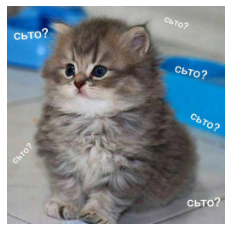

In [8]:
image = imread(image_src)
image = (2.0 * image / 1.0) - 1.0   # 1
array = np.array(image)
show(array)


## Calculate sizes

In [9]:
height = np.size(array, 0)
width = np.size(array, 1)

number_of_blocks = (height * width) // (block_height * block_width)
print(number_of_blocks, 'blocks')

input_layer_size = block_height * block_width * 3
print('input layer size:', input_layer_size)

print('hidden layer size:', hidden_layer_size)

4096 blocks
input layer size: 48
hidden layer size: 36


## Train

In [10]:
blocks = to_blocks(array).reshape(number_of_blocks, 1, input_layer_size)

w1 = np.random.rand(input_layer_size, hidden_layer_size) * 2 - 1
z = np.copy(w1)
w2 = z.transpose()

error_current = error_max + 1
epoch = 0
start = datetime.datetime.now()

while error_current > error_max:
    error_current = 0
    epoch += 1
    
    for i in blocks:
        y = i @ w1
        x1 = y @ w2
        dx = x1 - i
        w1 -= alpha * np.matmul(np.matmul(i.transpose(), dx), w2.transpose())
        w2 -= alpha * np.matmul(y.transpose(), dx)
    for i in blocks:
        dx = ((i @ w1) @ w2) - i
        error = (dx * dx).sum()
        error_current += error
    
    normalize_weights(w1)
    normalize_weights(w2)

    clear_output(wait=True)

    print('Epoch:', epoch)
    print('Error:', error_current)

end = datetime.datetime.now()
print("Done in ", end - start)

Epoch: 24
Error: 243.3471480046777
Done in  0:00:08.407034


## Test

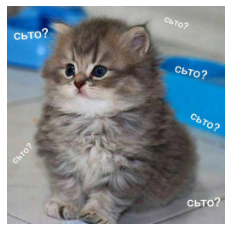

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


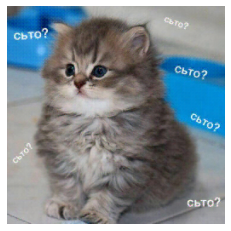

Z = 1.3178716501548402


In [11]:
show(array)
show_result()

Z = (np.size(w1, 0) * number_of_blocks) / ((np.size(w1, 0) + number_of_blocks)*hidden_layer_size + 2)
print("Z =", Z)